In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

In [6]:
# Ridge Regression 모델
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) # Hyper parameter
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.43840091137049564

In [7]:
# Lasso Regression 모델
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0) # Hyper param
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.37914194389255096

In [8]:
# Elastic-net Regression 모델
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5) # Hyper param  l1, l2 : l1에 값 주면 l2도 같은값, l2만 주면 l2만 쓰는것
elastic.fit(X_train, y_train)
elastic.score(X_test, y_test)

-0.0044383730131891674

In [11]:
# 정규화 선형회귀 모델별 가중치(계수) 비교
from sklearn.linear_model import LinearRegression

# 선형 모델을 비교하기 위해
linear = LinearRegression()
linear.fit(X_train, y_train)
# 계수를 한 문에 비교하기위한 DataFrame
coefs = np.vstack((linear.coef_, ridge.coef_, lasso.coef_, elastic.coef_))
index = ['linear', 'ridge', 'lasso', 'elastic']
coefs_df = pd.DataFrame(coefs, columns=data.feature_names, index=index)
print("정규화 선형회귀 모댈별 가중치(계수) 비교")
coefs_df

정규화 선형회귀 모댈별 가중치(계수) 비교


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
linear,47.746571,-241.991804,531.968569,381.565299,-918.490206,508.251474,116.940405,269.485086,695.806221,26.323431
ridge,50.551555,-67.722365,278.300728,197.624014,-6.245973,-26.226985,-151.394518,120.323196,215.854694,101.755543
lasso,0.000000,-0.000000,398.384368,46.178843,0.000000,0.000000,-0.000000,0.000000,238.187402,0.000000
elastic,0.413088,0.000000,3.298991,2.256939,0.339380,0.080784,-1.874661,2.143869,2.947964,1.701981


# diabetes Info
- age: 연령
- sex:성별
- BMI:체질량 지수
- bp:평균 혈압
- s1:tc, 총 혈정 콜레스테롤
- s2:ldl, 저밀도 지단백질
- s3:hdl, 고밀도 지단백질
- s4:tch, 총 콜레스테롤 / HDL
- s5:ltg, 아마도 혈청 트리글리세리드 수준의 로그
- s6:glu, 혈당 수치

In [29]:
print(data.keys())
print(data.data.shape)
print(data.target)
print(data.target.shape)
print(data.feature_names)
#print(data.target_filenames)
print(data.DESCR)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
(442, 10)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 2

# 보스턴 주택 가격 예측

In [31]:
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변홖
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


c:\ai_source\machinelearning\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


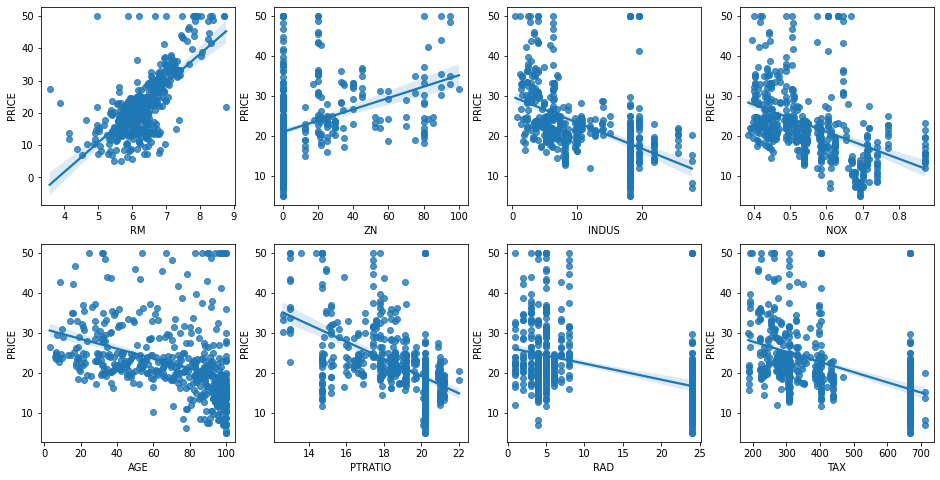

In [41]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'RAD', 'TAX']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
print('젃편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757
젃편 값: 40.9955951721646
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [48]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f" 5 folds의 개별 Negative MSE scores : {np.round(neg_mse_scores,2)}")
print(f" 5 folds의 개별 RMSE scores : {np.round(neg_mse_scores,2)}")
print(f" 5 folds의 평균 RMSE scores : {avg_rmse}")


 5 folds의 개별 Negative MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds의 개별 RMSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds의 평균 RMSE scores : 5.828658946215837


# Lasso Regression, Ridge Regressin, ElasticNet Regression 비교

In [46]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반홖
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric맊 반홖하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변홖하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [60]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)
# 반홖된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

####### Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


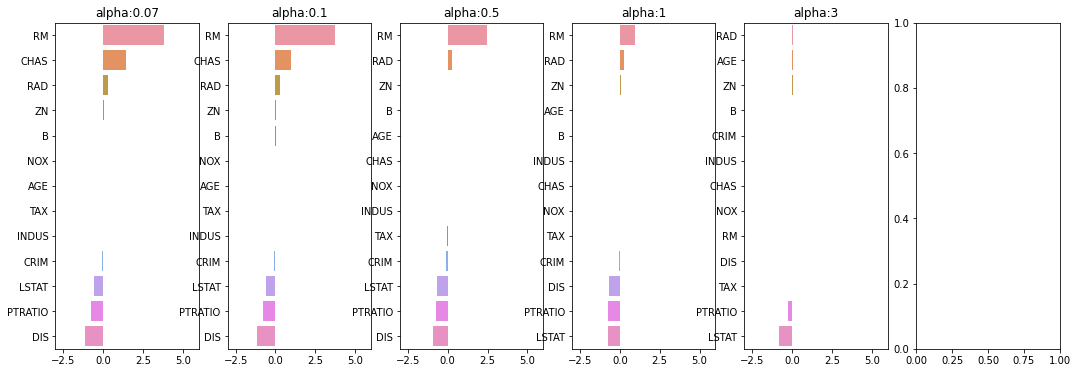

In [61]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=6)
for pos, alpha in enumerate(lasso_alphas):
    colname='alpha:' + str(alpha)
    coeff = coeff_lasso_df[colname]
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

In [62]:
# 리지에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
ridge_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_ridge_df =get_linear_reg_eval('Ridge', params=ridge_alphas, X_data_n=X_data, y_target_n=y_target)

####### Ridge #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.799 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.700 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 5.589 


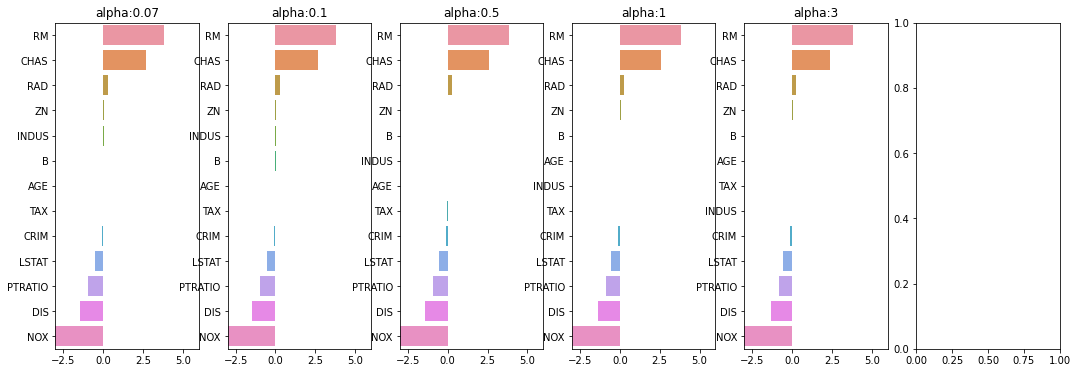

In [63]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=6)
for pos, alpha in enumerate(lasso_alphas):
    colname='alpha:' + str(alpha)
    coeff = coeff_ridge_df[colname]
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

In [65]:
# 반홖된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_ridge_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.815869,3.818233,3.840757,3.854000,3.847645
CHAS,2.674915,2.670019,2.612117,2.552393,2.371317
RAD,0.304241,0.303515,0.295989,0.290142,0.280973
ZN,0.046528,0.046572,0.047041,0.047443,0.048304
INDUS,0.017307,0.015999,0.002252,-0.008805,-0.028456
B,0.009352,0.009368,0.009538,0.009673,0.009908
AGE,0.000006,-0.000269,-0.003144,-0.005415,-0.009189
TAX,-0.012396,-0.012421,-0.012686,-0.012912,-0.013379
CRIM,-0.107628,-0.107474,-0.105866,-0.104595,-0.102470
LSTAT,-0.525617,-0.525966,-0.529832,-0.533343,-0.542009


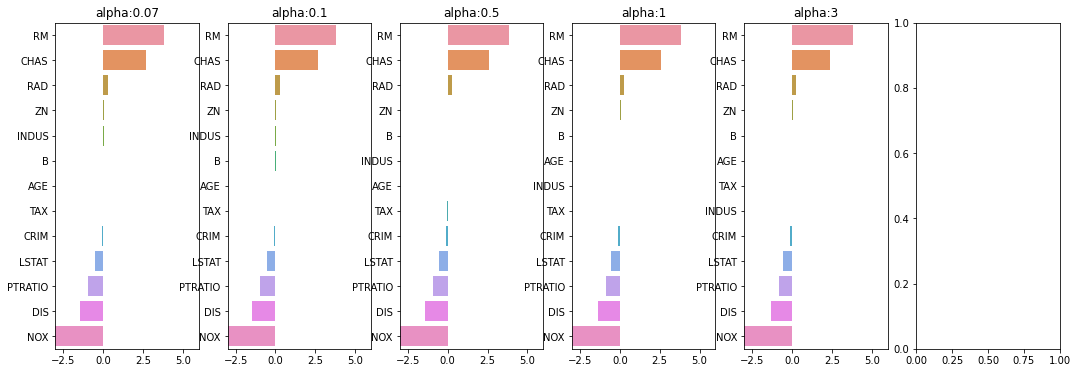

In [66]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=6)
for pos, alpha in enumerate(lasso_alphas):
    colname='alpha:' + str(alpha)
    coeff = coeff_ridge_df[colname]
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()